In [10]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [21]:
class AgentState(TypedDict):
    values: List[int]
    name : str
    operation: str
    result : int
    
def operations_node(state: AgentState) -> AgentState:
    if state['operation'] == "+":
        state['result'] = f"Hello {state['name']}, the sum of {state['values']} is {sum(state['values'])}"
    elif state['operation'] == "-":
        state['result'] = f"Hello {state['name']}, the difference of {state['values']} is {state['values'][0] - sum(state['values'][1:])}"
    elif state['operation'] == "*":
        state['result'] = f"Hello {state['name']}, the product of {state['values']} is {math.prod(state['values'])}"
    return state

graph = StateGraph(AgentState)

graph.add_node("operations", operations_node)

graph.set_entry_point("operations")
graph.set_finish_point("operations")

app = graph.compile()


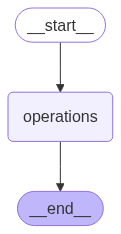

In [22]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [26]:
result1 = app.invoke({"name": "visitor", "values": [1, 2, 3], "operation": "+"})
result2 = app.invoke({"name": "visitor", "values": [1, 2, 3], "operation": "-"})
result3 = app.invoke({"name": "visitor", "values": [1, 2, 3], "operation": "*"})

NameError: name 'math' is not defined

In [27]:
result1['result']
result2['result']
result3['result']

NameError: name 'result3' is not defined